# Logistic Regression

In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

### Logistic function


# $f(x)={\frac {1}{1+e^{-x}}}.$ 

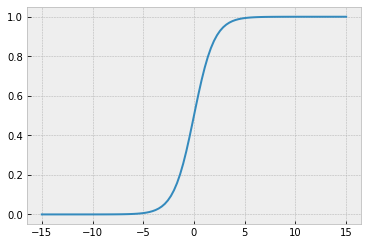

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-15,15,100)
plt.plot(x, sigmoid(x));

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


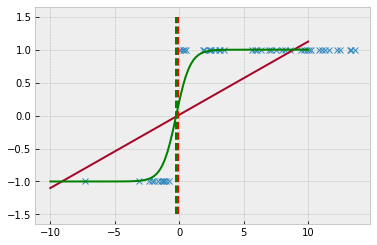

In [12]:
X = np.random.normal(5, 5, size=(50,1))
y0 = X[:,0]>0
y = y0.ravel()*2-1

# linear regression
regr = linear_model.LinearRegression().fit(X, y)
test_X=np.linspace(-10,10,100).reshape(-1,1)
plt.plot(X, y, 'x');
plt.plot(test_X, regr.predict(test_X))
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--')


# logistic regression
clf = linear_model.LogisticRegression()
clf.fit(X,y)
plt.plot(test_X, 2*sigmoid(test_X @ clf.coef_ +clf.intercept_)-1, 'g');
plt.plot([-clf.intercept_/clf.coef_[0]]*2, [-1.5,1.5], 'g--');

簡易的 logistic regression 實驗



使用 Iris dataset https://zh.wikipedia.org/wiki/安德森鸢尾花卉数据集

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


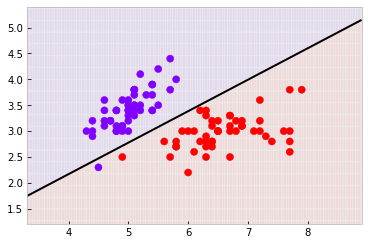

In [13]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# 只取 y=0,2 以及 X 的前兩個 features
X = X[y!=1, :2]
y = y[y!=1]
clf = linear_model.LogisticRegression()
clf.fit(X, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 logistic 的預測
Z = clf.decision_function(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

# 畫出顏色和邊界
plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.02)
plt.contour(grid[0], grid[1], Z, colors=['k'], linestyles=['-'],
                levels=[0])

# 標出 sample 點
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=50);


## Q
* 不同的設定

### Multi class

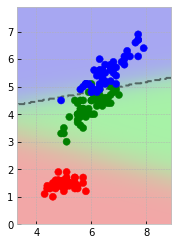

In [15]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# 只取兩個 features
X = X[:, [0,2]]

clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 logistic 的預測機率
Z = clf.predict_proba(grid.reshape(2, -1).T)
# 圖片
Z  = Z.reshape(200, 200, 3)

# 畫出顏色和邊界
plt.imshow(Z.swapaxes(0,1)[::-1, :], extent=(x_min, x_max, y_min, y_max), alpha=0.3)
plt.contour(grid[0], grid[1], Z.argmax(axis=2), 
            colors=['k','k','k'], linestyles=['--'],levels=[0,1,2], alpha=0.5)

# 標出 sample 點
plt.scatter(X[:,0], X[:, 1],  c=["rgb"[i] for i in y], zorder=10, s=50);

## MNIST

In [17]:
import gzip
import pickle
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
    
train_X, train_y = train_set
test_X, test_y = test_set


In [18]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [19]:
%%timeit -n 1 -r 1
clf.fit(train_X, train_y)

19.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [20]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(train_X) == train_y))

0.9342
236 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(test_X) == test_y))

0.9254
38.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q
* `multi_class ="ovr"`